In [ ]:
#import necessary libraries
import pandas as pd
from datasets import load_dataset, Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments, DataCollatorWithPadding
import torch


In [ ]:
#Load dataset
from datasets import load_dataset
ag_news = load_dataset("sh0416/ag_news")
ag_news

DatasetDict({
    train: Dataset({
        features: ['label', 'title', 'description'],
        num_rows: 120000
    })
    test: Dataset({
        features: ['label', 'title', 'description'],
        num_rows: 7600
    })
})

In [ ]:
# split the training and testing set of the ag_new
train_dataset= ag_news['train']
test_dataset= ag_news['test']

# Convert to pandas for easier preprocessing
train_df = pd.DataFrame(train_dataset)
test_df = pd.DataFrame(test_dataset)

In [ ]:
print("Train set", train_df.head())
print("Test set",test_df.head())

Train set    label                                              title  \
0      3  Wall St. Bears Claw Back Into the Black (Reuters)   
1      3  Carlyle Looks Toward Commercial Aerospace (Reu...   
2      3    Oil and Economy Cloud Stocks' Outlook (Reuters)   
3      3  Iraq Halts Oil Exports from Main Southern Pipe...   
4      3  Oil prices soar to all-time record, posing new...   

                                         description  
0  Reuters - Short-sellers, Wall Street's dwindli...  
1  Reuters - Private investment firm Carlyle Grou...  
2  Reuters - Soaring crude prices plus worries\ab...  
3  Reuters - Authorities have halted oil export\f...  
4  AFP - Tearaway world oil prices, toppling reco...  
Test set    label                                              title  \
0      3                  Fears for T N pension after talks   
1      4  The Race is On: Second Private Team Sets Launc...   
2      4      Ky. Company Wins Grant to Study Peptides (AP)   
3      4      Predic

In [ ]:
#Showcasing unique values in Ag News dataset
train_df['label'].unique()


array([3, 4, 2, 1])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   label        120000 non-null  int64 
 1   title        120000 non-null  object
 2   description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   label        7600 non-null   int64 
 1   title        7600 non-null   object
 2   description  7600 non-null   object
dtypes: int64(1), object(2)
memory usage: 178.3+ KB


In [ ]:
print("Null values in train set", train_df.isnull().sum())
print("Null values in test set", test_df.isnull().sum())

Null values in train set label          0
title          0
description    0
dtype: int64
Null values in test set label          0
title          0
description    0
dtype: int64


In [ ]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (120000, 3)
Test shape: (7600, 3)


In [ ]:
train_df

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,Pakistan's Musharraf Says Won't Quit as Army C...,KARACHI (Reuters) - Pakistani President Perve...
119996,2,Renteria signing a top-shelf deal,Red Sox general manager Theo Epstein acknowled...
119997,2,Saban not going to Dolphins yet,The Miami Dolphins will put their courtship of...
119998,2,Today's NFL games,PITTSBURGH at NY GIANTS Time: 1:30 p.m. Line: ...


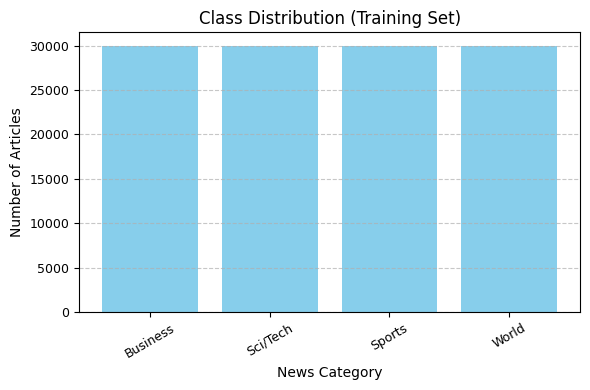

In [ ]:
label_map = {
    1: "World",
    2: "Sports",
    3: "Business",
    4: "Sci/Tech"
}

train_counts = train_df["label"].value_counts()

# Map the numeric labels to names on the x-axis without creating a new column
plt.figure(figsize=(6, 4))
plt.bar([label_map[i] for i in train_counts.index], train_counts.values, color='skyblue')
plt.xlabel("News Category", fontsize=10)
plt.ylabel("Number of Articles", fontsize=10)
plt.title("Class Distribution (Training Set)", fontsize=12)
plt.xticks(rotation=30, fontsize=9)
plt.yticks(fontsize=9)
plt.grid(axis="y", linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


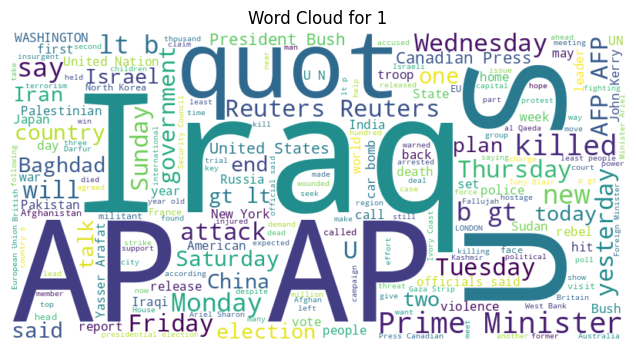

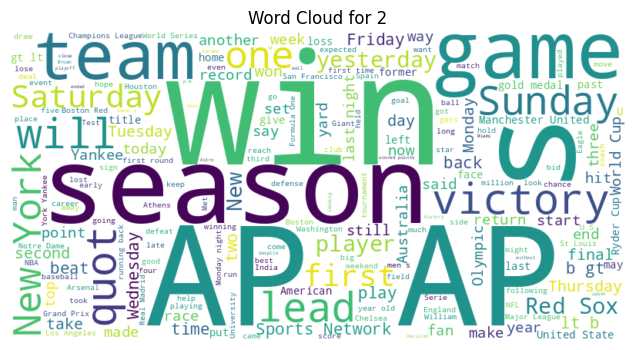

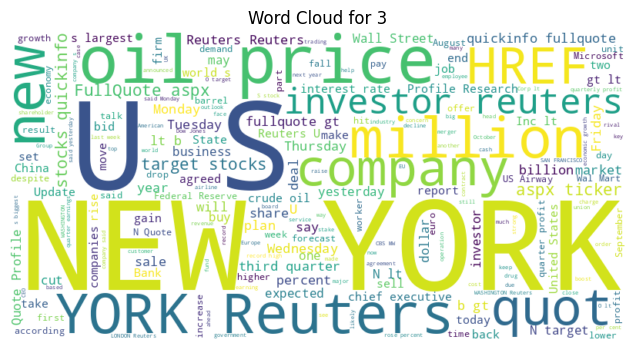

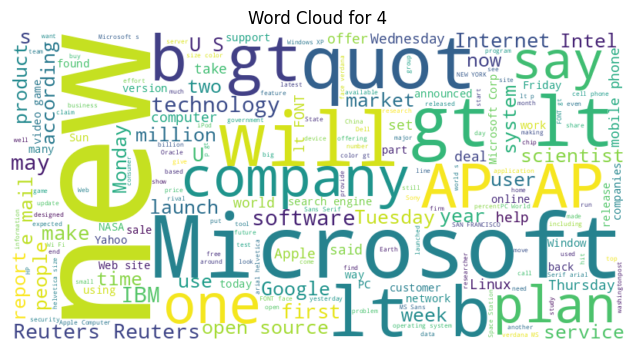

In [ ]:
from wordcloud import WordCloud

for label, group in train_df.groupby('label'):
    text = " ".join(group['title'] + " " + group['description'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {label}")
    plt.show()


In [ ]:
def preprocess(df):
    # Concatenate title and description
    df['title_description'] = df['title'] + " " + df['description']
    df.drop(columns=['title', 'description'], inplace=True)

    # Shift labels from 1-4 → 0-3
    df['label'] = df['label'] - 1

    # Ensure integer type
    df['label'] = df['label'].astype(int)

    print("Unique labels after shifting:", df['label'].unique())
    return df


In [ ]:
#Cleaning the dataset
import re

def clean_text(text):
    text = str(text).lower()                     # lowercase
    text = re.sub(r'<.*?>', '', text)            # remove HTML tags
    text = re.sub(r'http\S+', '', text)          # remove URLs
    text = re.sub(r'\s+', ' ', text).strip()    # normalize whitespace
    return text

preprocess(train_df)
train_df['title_description'] = train_df['title_description'].apply(clean_text)

Unique labels after shifting: [2 3 1 0]


In [ ]:
train_df

,label,title_description
0,2,wall st. bears claw back into the black (reute...
1,2,carlyle looks toward commercial aerospace (reu...
2,2,oil and economy cloud stocks' outlook (reuters...
3,2,iraq halts oil exports from main southern pipe...
4,2,"oil prices soar to all-time record, posing new..."
...,...,...
119995,0,pakistan's musharraf says won't quit as army c...
119996,1,renteria signing a top-shelf deal red sox gene...
119997,1,saban not going to dolphins yet the miami dolp...
119998,1,today's nfl games pittsburgh at ny giants time...


In [ ]:
train_df['label'].value_counts()


,count
label,
2,30000
3,30000
1,30000
0,30000


In [ ]:
preprocess(test_df)
test_df.apply(clean_text)

Unique labels after shifting: [2 3 1 0]


,0
label,0 2 1 3 2 3 3 3 4 3 .. 7595 0 7596 1 7597 1 75...
title_description,0 fears for t n pension after talks unions rep...


In [ ]:
test_df['label'].unique()

array([2, 3, 1, 0])

In [ ]:
from datasets import Dataset
from transformers import AutoTokenizer

#choose the pre-trained model
model_ckpt = "distilbert-base-uncased"

#initialize the tokenizer corresponding to the pre-trained model
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

#convert pandas DataFrames to Hugging Face Datasets for compatibility with Trainer API
train_dataset = Dataset.from_pandas(train_df)  # Training dataset
val_dataset   = Dataset.from_pandas(test_df)    # Validation dataset


In [ ]:
def tokenize(batch):
    return tokenizer(batch["title_description"], padding="max_length", truncation=True, max_length=256)

# Apply tokenization
train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset   = val_dataset.map(tokenize, batched=True)

# Remove unnecessary columns
train_dataset = train_dataset.remove_columns([col for col in train_dataset.column_names if col not in ["input_ids", "attention_mask", "label"]])
val_dataset   = val_dataset.remove_columns([col for col in val_dataset.column_names if col not in ["input_ids", "attention_mask", "label"]])


Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

Map:   0%|          | 0/7600 [00:00<?, ? examples/s]

In [ ]:
train_df['label'].unique()

array([2, 3, 1, 0])

In [ ]:
# Define the number of output classes for classification
num_labels = train_df['label'].nunique()

# Adjust labels to be 0-indexed if they are 1-indexed (e.g., [1, 2, 3, 4] -> [0, 1, 2, 3])
# This is crucial for models like AutoModelForSequenceClassification which expect 0-indexed labels.
# Check if labels are 1-indexed (e.g., min label is 1 and max label is num_labels)
if min(train_dataset['label']) == 1 and max(train_dataset['label']) == num_labels:
    def adjust_labels(batch):
        batch['label'] = [l - 1 for l in batch['label']]
        return batch

    train_dataset = train_dataset.map(adjust_labels, batched=True)
    val_dataset = val_dataset.map(adjust_labels, batched=True)

# Set device to GPU if available, otherwise CPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the pre-trained model for sequence classification and adapt it to our number of labels
model = AutoModelForSequenceClassification.from_pretrained(
    model_ckpt,
    num_labels=num_labels
).to(device)  # Move model to the selected device (GPU/CPU)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

# Define the hyperparameters and training configurations
training_args = TrainingArguments(
    output_dir="./results",# Directory to save model checkpoints and logs
    eval_strategy="epoch", # Evaluate the model at the end of each epoch
    save_strategy="epoch", # Save the model checkpoint at the end of each epoch
    save_total_limit=2, # Keep only the last 2 checkpoints to save space

    #learning-rate=5e-5
    learning_rate=3e-5, # Learning rate for optimizer
    per_device_train_batch_size=16, # Batch size for training
    per_device_eval_batch_size=16, # Batch size for evaluation
    num_train_epochs=3, # Number of training epochs

    #weight_decay=0.05
    weight_decay=0.01, # L2 regularization to prevent overfitting
    load_best_model_at_end=True, # Automatically load the best model after training
    metric_for_best_model="accuracy", # Metric to determine the best model
    fp16=True, # Use mixed precision for faster training on GPU
    gradient_accumulation_steps=2, # Accumulate gradients to simulate a larger batch size
    logging_strategy="epoch", # Log metrics at the end of each epoch
    seed=42 # Set seed for reproducibility
)


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(p):
    preds = p.predictions.argmax(axis=-1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

trainer = Trainer(
    model=model, # The pre-trained/fine-tuned model
    args=training_args, # Training arguments defined earlier
    train_dataset=train_dataset, # Training dataset
    eval_dataset=val_dataset,# Validation dataset
    tokenizer=tokenizer, # Tokenizer used for preprocessing
    compute_metrics=compute_metrics  # Custom metrics function
)

/tmp/ipython-input-877705899.py:10: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.222100,0.177178,0.939474,0.939529,0.939706,0.939474
2,0.126500,0.170986,0.946974,0.947050,0.947168,0.946974
3,0.079800,0.193945,0.948553,0.948555,0.948622,0.948553


TrainOutput(global_step=11250, training_loss=0.14279406195746527, metrics={'train_runtime': 2327.0557, 'train_samples_per_second': 154.702, 'train_steps_per_second': 4.834, 'total_flos': 2.384498221056e+16, 'train_loss': 0.14279406195746527, 'epoch': 3.0})

In [ ]:
# Sample test data with headline + description
sample_texts_ag = [
    # World
    {
        "headline": "World leaders meet to discuss climate change and global policies",
        "short_description": "Leaders from multiple countries gather to set targets for emission reductions and sustainability."
    },
    {
        "headline": "United Nations warns of escalating refugee crisis in Europe",
        "short_description": "Thousands of displaced people face humanitarian challenges amid political tensions."
    },
    {
        "headline": "International summit addresses global water scarcity and sustainable solutions",
        "short_description": "Experts propose new strategies to ensure clean water access worldwide."
    },
    {
        "headline": "National elections spark debates on economic and foreign policy",
        "short_description": "Candidates outline their visions for the next government term."
    },
    {
        "headline": "Peace talks resume between conflicting nations in the Middle East",
        "short_description": "Diplomats aim to reach an agreement to end long-standing hostilities."
    },

    # Sports
    {
        "headline": "Local basketball team wins state championship after thrilling overtime",
        "short_description": "The championship game went into overtime, and the local team clinched the victory."
    },
    {
        "headline": "Football league announces schedule changes for the upcoming season",
        "short_description": "Teams will face new opponents in revised match fixtures."
    },
    {
        "headline": "Olympic athletes break records in swimming and track events",
        "short_description": "Spectators celebrate historic performances in the international games."
    },
    {
        "headline": "Local marathon attracts thousands of runners and supporters",
        "short_description": "Participants from across the country join to promote fitness and charity."
    },
    {
        "headline": "Tennis champion defends title at major international tournament",
        "short_description": "Fans cheer as the top-ranked player wins the finals in straight sets."
    },

    # Business
    {
        "headline": "Stock markets surge as major companies report record earnings",
        "short_description": "Investors react positively to quarterly financial results across industries."
    },
    {
        "headline": "Startup raises millions to develop clean energy solutions",
        "short_description": "The investment will fund research in sustainable and renewable technologies."
    },
    {
        "headline": "Financial analysts predict strong quarterly growth for tech sector",
        "short_description": "Market trends indicate high demand for software and cloud solutions."
    },
    {
        "headline": "Global trade agreements aim to reduce tariffs on electronics",
        "short_description": "Countries negotiate policies to support cross-border business growth."
    },
    {
        "headline": "Retail giant announces expansion into new international markets",
        "short_description": "The company plans to open stores and online services worldwide."
    },

    # Sci/Tech
    {
        "headline": "Tech company announces launch of AI-powered software platform",
        "short_description": "The new platform aims to automate workflows and enhance productivity across industries."
    },
    {
        "headline": "Scientists discover new exoplanet orbiting nearby star",
        "short_description": "Astronomers use advanced telescopes to identify potential habitable planets."
    },
    {
        "headline": "Breakthrough in renewable energy promises cheaper and cleaner electricity",
        "short_description": "Researchers develop innovative solar panels with higher efficiency."
    },
    {
        "headline": "New study reveals the impact of social media on teen mental health",
        "short_description": "Findings highlight both positive and negative effects of online interactions."
    },
    {
        "headline": "Space agency announces mission to explore Jupiter's icy moon Europa",
        "short_description": "The probe will gather data to study the moon's potential for life."
    }
]
index_to_label_ag = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Sci/Tech"
}
# Combine + preprocess
sample_texts_combined = [f"{text['headline']} {text['short_description']}" for text in sample_texts_ag]


inputs = tokenizer(sample_texts_combined, padding=True, truncation=True, max_length=512, return_tensors="pt").to(device)
with torch.no_grad():
    outputs = model(**inputs)
    preds = torch.argmax(outputs.logits, dim=1).cpu().numpy()


predicted_labels = [index_to_label_ag[i] for i in preds]

for text, label in zip(sample_texts_ag, predicted_labels):
    print(f"Headline: {text['headline']}")
    print(f"Predicted Category: {label}\n")



Headline: World leaders meet to discuss climate change and global policies
Predicted Category: World

Headline: United Nations warns of escalating refugee crisis in Europe
Predicted Category: World

Headline: International summit addresses global water scarcity and sustainable solutions
Predicted Category: Sci/Tech

Headline: National elections spark debates on economic and foreign policy
Predicted Category: World

Headline: Peace talks resume between conflicting nations in the Middle East
Predicted Category: World

Headline: Local basketball team wins state championship after thrilling overtime
Predicted Category: Sports

Headline: Football league announces schedule changes for the upcoming season
Predicted Category: Sports

Headline: Olympic athletes break records in swimming and track events
Predicted Category: World

Headline: Local marathon attracts thousands of runners and supporters
Predicted Category: World

Headline: Tennis champion defends title at major international tournam

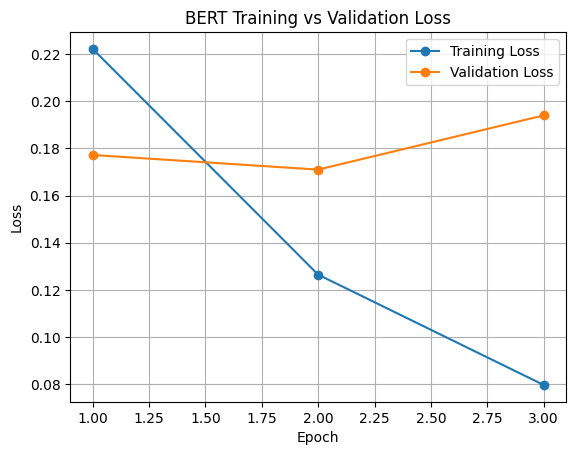

In [ ]:
import matplotlib.pyplot as plt

log_history = trainer.state.log_history

epochs = []
train_loss = []
eval_loss = []
accuracy = []
f1 = []
precision = []
recall = []

for log in log_history:
    if 'loss' in log and 'epoch' in log:
        train_loss.append(log['loss'])
        epochs.append(log['epoch'])
    if 'eval_loss' in log:
        eval_loss.append(log['eval_loss'])
    if 'eval_accuracy' in log:
        accuracy.append(log['eval_accuracy'])
    if 'eval_f1' in log:
        f1.append(log['eval_f1'])
    if 'eval_precision' in log:
        precision.append(log['eval_precision'])
    if 'eval_recall' in log:
        recall.append(log['eval_recall'])
plt.figure()
plt.plot(epochs[:len(train_loss)], train_loss, marker='o', label='Training Loss')
plt.plot(epochs[:len(eval_loss)], eval_loss, marker='o', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('BERT Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


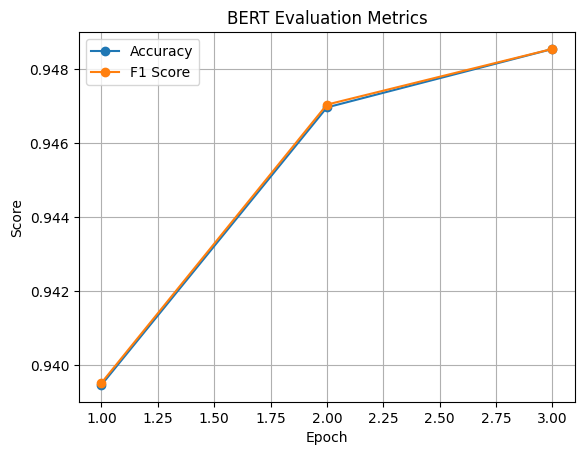

In [ ]:
plt.figure()
plt.plot(epochs[:len(accuracy)], accuracy, marker='o', label='Accuracy')
plt.plot(epochs[:len(f1)], f1, marker='o', label='F1 Score')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('BERT Evaluation Metrics')
plt.legend()
plt.grid(True)
plt.show()


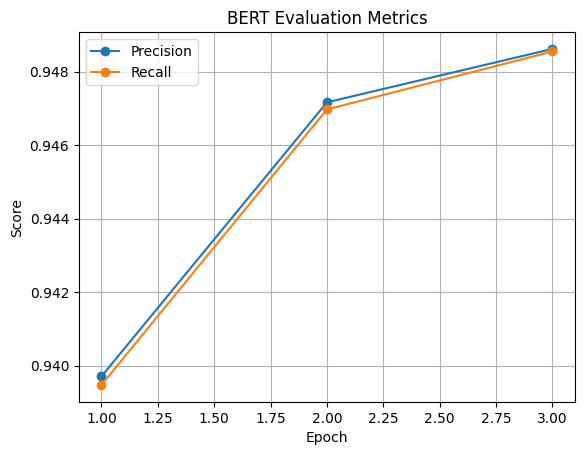

In [ ]:
plt.figure()
plt.plot(epochs[:len(precision)], precision, marker='o', label='Precision')
plt.plot(epochs[:len(recall)], recall, marker='o', label='Recall')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('BERT Evaluation Metrics')
plt.legend()
plt.grid(True)
plt.show()